![](cover.png)

# 決策樹(迴歸)

## 介紹

在我們的上一節，提到CART決策樹不僅可以用於分類，還可以用在迴歸問題，我們就一起來試試看

## 資料集

scikit-learn內建的Boston地產資料集

## ✔ 開始撰寫程式

### Step 0. 讀入我們的波士頓地產數據集作為練習

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 為了顯示的漂亮, 我刻意的把印出來的row只顯示15個和column只顯示十個, 大家練習的時候可以去掉下面兩行
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 10)

boston = load_boston()
df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
df['target'] = boston['target']
# 如果你想要的話，你可以把他輸出成csv觀察看看
# df.to_csv('boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,...,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,...,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,...,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,...,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,...,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,...,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,...,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,...,311.0,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,...,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,...,391.0,19.2,396.90,14.33,16.8


### Step 1. 先畫個圖

***相關係數: 兩個東西的相關性***

完全正相關(兩個東西總是一起上升): 1

完全正相關(一個東西上升的時候, 另一個總是下降): -1

一樣先畫個圖試試看

補充：你可以使用 https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html 選擇一個你喜歡的調色盤放入cmap參數


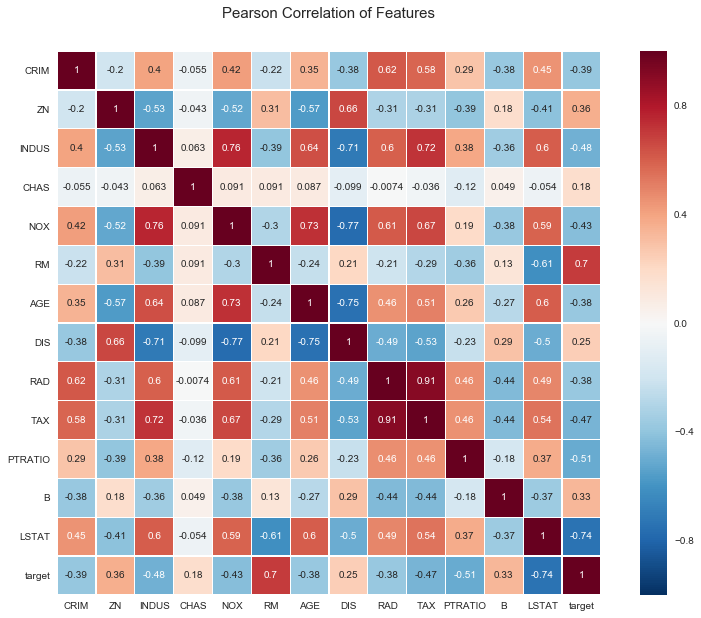

In [2]:
plt.figure(figsize=(14,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.astype(float).corr(),linewidths=0.1, 
            square=True, linecolor='white', annot=True)

一樣你發現了，像CHAS, DIS這些特徵影響的幅度應該都是比較小的
RM和LSTAT的幅度應該是比較大的

### Step 2. 訓練模型

我們使用DecisionTreeRegressor來訓練

一樣的步驟

1. 創好一個Regressor
2. 使用fit將你要訓練的數據餵進來

In [3]:
# 我們把我們擁有的資料集分成兩份, 一份測試, 一份訓練
from sklearn.model_selection import train_test_split
# 把資料分成兩部分(1. 訓練資料 2. 測試資料)
data_train, data_test, target_train, target_test = train_test_split(boston['data'], 
                                                                    boston['target'], 
                                                                    test_size=0.1)

In [4]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth = 3)
regr.fit(data_train, target_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

訓練完畫個圖吧，我們使用第三方軟體graphviz以及python函式庫來操作graphviz

請完成下面的安裝步驟
1. 請來到 http://www.graphviz.org/download/ 安裝graphviz到你的電腦
2. 請使用pip或者是pycharm安裝好graphviz函式庫

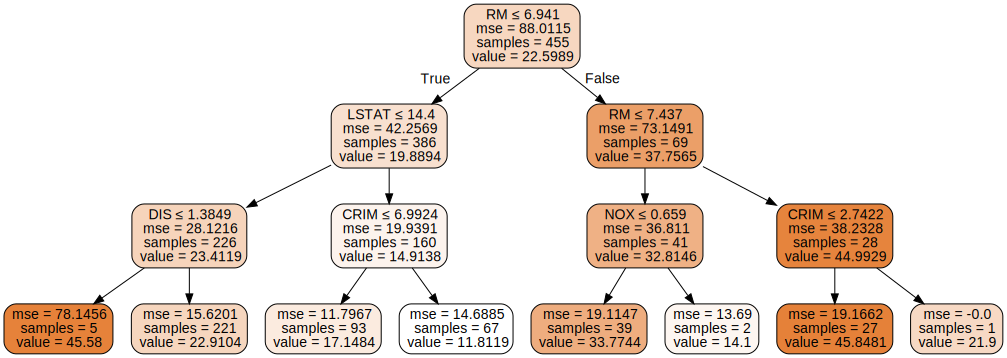

In [5]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(regr, out_file=None,
                         feature_names=df.columns,
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
# 你可以把註解解除, 輸出一個pdf
# graph.render("boston")
graph

In [6]:
# 我們可以直接使用numpy來實現兩個list的直接相減
import numpy as np
predict = regr.predict(data_test)
print("實際的價錢:", target_test)
print("預測的價錢:", predict)
interval = np.subtract(predict, target_test)
print("差異:", interval)



實際的價錢: [20.3 19.3 28.2 24.5 29.4 29.  19.9 21.  21.  21.6 43.1 19.2 12.7 27.5
 14.3 22.4 10.2 32.2 13.4 19.3 22.6  9.7 27.5 22.3 19.4 20.7 24.8 14.4
 18.2 21.9 31.7 50.  22.  15.  18.8 22.  23.6 26.5 20.4 16.7 23.9 15.
 26.4 14.8 13.1 16.1 26.4 24.8 21.2 20.6 20.1]
預測的價錢: [22.91040724 22.91040724 22.91040724 22.91040724 22.91040724 33.77435897
 22.91040724 22.91040724 22.91040724 22.91040724 45.84814815 22.91040724
 17.1483871  22.91040724 17.1483871  17.1483871  11.8119403  33.77435897
 11.8119403  22.91040724 22.91040724 11.8119403  22.91040724 22.91040724
 17.1483871  22.91040724 22.91040724 17.1483871  22.91040724 22.91040724
 33.77435897 45.84814815 22.91040724 17.1483871  17.1483871  22.91040724
 22.91040724 22.91040724 22.91040724 11.8119403  33.77435897 14.1
 22.91040724 17.1483871  11.8119403  17.1483871  22.91040724 22.91040724
 22.91040724 22.91040724 11.8119403 ]
差異: [ 2.61040724  3.61040724 -5.28959276 -1.58959276 -6.48959276  4.77435897
  3.01040724  1.91040724  1.9104072

### Step 4. 確認一下預測差異

這裡我們不使用混淆矩陣了，而是使用r2 score，r2 score的公式如下

(擷取自wiki https://zh.wikipedia.org/wiki/%E5%86%B3%E5%AE%9A%E7%B3%BB%E6%95%B0)

![](r2_formula.png)

1代表最佳，0代表普通

我們也不用太數學的方式解釋

我們只看兩個特殊值

1. r2 = 1，代表res = 0，也就是你所有猜的數字都跟真正的數字一樣！
2. r2 = 0，代表res = 1，也就是你所有猜的數字都是平均值！跟我們之前分類的時候50% 50%是一模一樣的意思

當然跟我們之前分類的一樣，訓練的時候如果你得到r2 = 1，未必是最佳的，也就是分類所說的過擬合(Overfitting)

我們寧願放棄一點點，讓r2大於0.7其實就是可以接受的值了

在預測的時候，r2大於0.5其實就是可以接受的值了

當然，r2的選擇依不同領域，不同情況可能會需要更高一點

In [7]:
from sklearn.metrics import r2_score
print("訓練資料r2 score:", r2_score(target_train,regr.predict(data_train)))
print("測試資料r2 score:", r2_score(target_test,regr.predict(data_test)))

訓練資料r2 score: 0.8198453341022476
測試資料r2 score: 0.7707977640804566


觀察一下哪個特徵最重要，看起來跟我們一開始畫的圖大致符合，RM的重要性最高(0.6)，再接下來是LSTAT(0.2)

In [13]:
regr.feature_importances_

array([0.0506248 , 0.        , 0.        , 0.        , 0.02242999,
       0.64434195, 0.        , 0.07653469, 0.        , 0.        ,
       0.        , 0.        , 0.20606857])